# <center> Projet :  Consommation électrique de la Ville de Seattle </center>



<img src="https://d1csarkz8obe9u.cloudfront.net/posterpreviews/seattle-skyline-design-template-d3a16e597183a6ef804811814a4074ad_screen.jpg?ts=1626443274" width=292>

# <center> Partie Analyse  exploratoire</center>


### <center>Dataset : Seattle </center>
### <center> https://www.kaggle.com/city-of-seattle/sea-building-energy-benchmarking/version/8?select=2016-building-energy-benchmarking.csv <center>

# Chargement des données + création dataset final

Dans cette partie nous chargerons les données et nous créerons un dataset agrégeant les informations de 2015 et de 2016.

In [1]:
#Ci dessous la liste des packages que nous utilsons pour ce projet.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import rpy2

#Afficher toute les colonnes
pd.set_option('display.max_columns', None)

print("Les packages sont chargés.")

Les packages sont chargés.


In [2]:
df_2015=pd.read_csv("ENERGY_2015.csv",sep=",") 
print("Le dataset est chargé")

Le dataset est chargé


In [3]:
df_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [4]:
df_2015=df_2015.rename(columns={"GHGEmissions(MetricTonsCO2e)": "TotalGHGEmissions"})

In [5]:
df_2016=pd.read_csv("ENERGY_2016.csv",sep=",") #Openfoodfacts real data, 
#data_light=data.iloc[1:10000, 0:30]
#data_light.to_csv('data_light.csv', index=False)
print("Le dataset est chargé")

Le dataset est chargé


In [6]:
df_2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [7]:
liste=list(set(list(df_2015.columns)).intersection(list(df_2016.columns)))
liste

['ThirdLargestPropertyUseTypeGFA',
 'ComplianceStatus',
 'Neighborhood',
 'Electricity(kWh)',
 'SiteEUI(kBtu/sf)',
 'PropertyGFATotal',
 'OSEBuildingID',
 'SecondLargestPropertyUseType',
 'NaturalGas(therms)',
 'NumberofFloors',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'SiteEUIWN(kBtu/sf)',
 'ListOfAllPropertyUseTypes',
 'PrimaryPropertyType',
 'PropertyGFAParking',
 'YearsENERGYSTARCertified',
 'SecondLargestPropertyUseTypeGFA',
 'LargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'TotalGHGEmissions',
 'BuildingType',
 'DataYear',
 'PropertyGFABuilding(s)',
 'NumberofBuildings',
 'ENERGYSTARScore',
 'DefaultData',
 'SiteEnergyUse(kBtu)',
 'NaturalGas(kBtu)',
 'PropertyName',
 'TaxParcelIdentificationNumber',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'Electricity(kBtu)',
 'CouncilDistrictCode',
 'Outlier',
 'YearBuilt',
 'LargestPropertyUseType']

In [8]:
df_2016=df_2016[liste]
df_2015=df_2015[liste]
df=pd.concat((df_2015,df_2016),axis=0)
df

,ThirdLargestPropertyUseTypeGFA,ComplianceStatus,Neighborhood,Electricity(kWh),SiteEUI(kBtu/sf),PropertyGFATotal,OSEBuildingID,SecondLargestPropertyUseType,NaturalGas(therms),NumberofFloors,SiteEnergyUseWN(kBtu),SteamUse(kBtu),SiteEUIWN(kBtu/sf),ListOfAllPropertyUseTypes,PrimaryPropertyType,PropertyGFAParking,YearsENERGYSTARCertified,SecondLargestPropertyUseTypeGFA,LargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,TotalGHGEmissions,BuildingType,DataYear,PropertyGFABuilding(s),NumberofBuildings,ENERGYSTARScore,DefaultData,SiteEnergyUse(kBtu),NaturalGas(kBtu),PropertyName,TaxParcelIdentificationNumber,SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),Electricity(kBtu),CouncilDistrictCode,Outlier,YearBuilt,LargestPropertyUseType
0,NaN,Compliant,DOWNTOWN,1.080307e+06,78.900000,88434,1,NaN,12724.000000,12.0,7.097539e+06,2023032.0,80.300000,Hotel,Hotel,0,NaN,NaN,88434.0,NaN,249.43,NonResidential,2015,88434,1.0,65.0,No,6.981428e+06,1.272388e+06,MAYFLOWER PARK HOTEL,659000030,173.500000,175.100000,3.686160e+06,7,NaN,1927,Hotel
1,4622.0,Compliant,DOWNTOWN,1.144563e+06,94.400000,103566,2,Parking,44490.000000,11.0,8.765788e+06,0.0,99.000000,"Hotel, Parking, Restaurant",Hotel,15064,NaN,15064.0,83880.0,Restaurant,263.51,NonResidential,2015,88502,1.0,51.0,No,8.354235e+06,4.448985e+06,PARAMOUNT HOTEL,659000220,191.300000,195.200000,3.905411e+06,7,NaN,1996,Hotel
2,0.0,Compliant,DOWNTOWN,1.458393e+07,96.600000,961990,3,Parking,37099.000000,41.0,7.550627e+07,19660404.0,99.700000,"Hotel, Parking, Swimming Pool",Hotel,0,NaN,100000.0,757243.0,Swimming Pool,2061.48,NonResidential,2015,961990,1.0,18.0,Yes,7.313066e+07,3.709900e+06,WESTIN HOTEL,659000475,242.700000,246.500000,4.976244e+07,7,NaN,1969,Hotel
3,NaN,Compliant,DOWNTOWN,8.115210e+05,460.400000,61320,5,NaN,20019.000000,10.0,2.836344e+07,23458518.0,462.500000,Hotel,Hotel,0,NaN,NaN,61320.0,NaN,1936.34,NonResidential,2015,61320,1.0,1.0,No,2.822932e+07,2.001894e+06,HOTEL MAX,659000640,636.300000,643.200000,2.769023e+06,7,High Outlier,1926,Hotel
4,0.0,Compliant,DOWNTOWN,1.777841e+06,120.100000,119890,8,Parking,87631.000000,18.0,1.507824e+07,0.0,122.100000,"Hotel, Parking, Swimming Pool",Hotel,12460,NaN,68009.0,123445.0,Swimming Pool,507.70,NonResidential,2015,107430,1.0,67.0,No,1.482910e+07,8.763105e+06,WARWICK SEATTLE HOTEL,659000970,228.800000,227.100000,6.066245e+06,7,NaN,1980,Hotel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,NaN,Error - Correct Default Data,GREATER DUWAMISH,1.536550e+05,69.099998,12294,50222,NaN,3254.750244,1.0,9.430032e+05,0.0,76.699997,Office,Office,0,NaN,NaN,12294.0,NaN,20.94,Nonresidential COS,2016,12294,1.0,46.0,True,8.497457e+05,3.254750e+05,Horticulture building,1624049080,161.699997,176.100006,5.242709e+05,2,NaN,1990,Office
3372,NaN,Compliant,DOWNTOWN,1.162210e+05,59.400002,16000,50223,NaN,5537.299805,1.0,1.053706e+06,0.0,65.900002,Other - Recreation,Other,0,NaN,NaN,16000.0,NaN,32.17,Nonresidential COS,2016,16000,1.0,NaN,False,9.502762e+05,5.537300e+05,International district/Chinatown CC,3558300000,114.199997,118.900002,3.965461e+05,2,NaN,2004,Other - Recreation
3373,0.0,Compliant,MAGNOLIA / QUEEN ANNE,5.252517e+05,438.200012,13157,50224,Fitness Center/Health Club/Gym,39737.390630,1.0,6.053764e+06,0.0,460.100006,"Fitness Center/Health Club/Gym, Other - Recrea...",Other,0,NaN,5574.0,7583.0,Swimming Pool,223.54,Nonresidential COS,2016,13157,1.0,NaN,False,5.765898e+06,3.973739e+06,Queen Anne Pool,1794501150,744.799988,767.799988,1.792159e+06,7,NaN,1974,Other - Recreation
3374,484.0,Compliant,GREATER DUWAMISH,1.022480e+05,51.000000,14101,50225,Fitness Center/Health Club/Gym,3706.010010,1.0,7.828413e+05,0.0,55.500000,"Fitness Center/Health Club/Gym, Food Service, ...",Mixed Use Property,0,NaN,6501.0,6601.0,Pre-school/Daycare,22.11,Nonresidential COS,2016,14101,1.0,NaN,False,7.194712e+05,3.706010e+05,South Park Community Center,7883603155,105.300003,110.800003,3.48

# Nettoyage des données

Dans cette partie nous nettoierons les données du dataset. Nous traiterons les valeurs manquantes, les outliers et créerons de nouvelles variables.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6716 entries, 0 to 3375
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ThirdLargestPropertyUseTypeGFA   1156 non-null   float64
 1   ComplianceStatus                 6716 non-null   object 
 2   Neighborhood                     6716 non-null   object 
 3   Electricity(kWh)                 6697 non-null   float64
 4   SiteEUI(kBtu/sf)                 6699 non-null   float64
 5   PropertyGFATotal                 6716 non-null   int64  
 6   OSEBuildingID                    6716 non-null   int64  
 7   SecondLargestPropertyUseType     3238 non-null   object 
 8   NaturalGas(therms)               6697 non-null   float64
 9   NumberofFloors                   6708 non-null   float64
 10  SiteEnergyUseWN(kBtu)            6700 non-null   float64
 11  SteamUse(kBtu)                   6697 non-null   float64
 12  SiteEUIWN(kBtu/sf)  

In [10]:
# Nous supprimons les colonnes avec plus de 40% de valeurs manquantes.
df=df.drop(['ThirdLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',"SecondLargestPropertyUseTypeGFA" ,'SecondLargestPropertyUseType','YearsENERGYSTARCertified', 'Outlier',"YearsENERGYSTARCertified"], axis=1)


In [11]:
#drop si les variables d'intérêts ne sont pas la
df=df[df['ENERGYSTARScore'].isnull()==0]
df=df[df['SiteEnergyUseWN(kBtu)'].isnull()==0]
df=df[df['TotalGHGEmissions'].isnull()==0]

In [12]:
#colonnes numeriques
list(df.select_dtypes(include=['float64']).columns)

['Electricity(kWh)',
 'SiteEUI(kBtu/sf)',
 'NaturalGas(therms)',
 'NumberofFloors',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'SiteEUIWN(kBtu/sf)',
 'LargestPropertyUseTypeGFA',
 'TotalGHGEmissions',
 'NumberofBuildings',
 'ENERGYSTARScore',
 'SiteEnergyUse(kBtu)',
 'NaturalGas(kBtu)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'Electricity(kBtu)']

In [13]:
#colonnes numeriques
list(df.select_dtypes(include=['float64',"int64"]).columns)

['Electricity(kWh)',
 'SiteEUI(kBtu/sf)',
 'PropertyGFATotal',
 'OSEBuildingID',
 'NaturalGas(therms)',
 'NumberofFloors',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'SiteEUIWN(kBtu/sf)',
 'PropertyGFAParking',
 'LargestPropertyUseTypeGFA',
 'TotalGHGEmissions',
 'DataYear',
 'PropertyGFABuilding(s)',
 'NumberofBuildings',
 'ENERGYSTARScore',
 'SiteEnergyUse(kBtu)',
 'NaturalGas(kBtu)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'Electricity(kBtu)',
 'CouncilDistrictCode',
 'YearBuilt']

In [14]:
for i in list(df.select_dtypes(include=['float64',"int64"]).columns):
    df[i].fillna(df[i].median(),inplace=True)

In [15]:
for i in list(df.select_dtypes(include=["object"]).columns):
    df[i].fillna(df[i].value_counts().index[0],inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5092 entries, 0 to 3371
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ComplianceStatus               5092 non-null   object 
 1   Neighborhood                   5092 non-null   object 
 2   Electricity(kWh)               5092 non-null   float64
 3   SiteEUI(kBtu/sf)               5092 non-null   float64
 4   PropertyGFATotal               5092 non-null   int64  
 5   OSEBuildingID                  5092 non-null   int64  
 6   NaturalGas(therms)             5092 non-null   float64
 7   NumberofFloors                 5092 non-null   float64
 8   SiteEnergyUseWN(kBtu)          5092 non-null   float64
 9   SteamUse(kBtu)                 5092 non-null   float64
 10  SiteEUIWN(kBtu/sf)             5092 non-null   float64
 11  ListOfAllPropertyUseTypes      5092 non-null   object 
 12  PrimaryPropertyType            5092 non-null   o

In [17]:
df.shape

(5092, 32)

In [18]:
df.describe()

,Electricity(kWh),SiteEUI(kBtu/sf),PropertyGFATotal,OSEBuildingID,NaturalGas(therms),NumberofFloors,SiteEnergyUseWN(kBtu),SteamUse(kBtu),SiteEUIWN(kBtu/sf),PropertyGFAParking,LargestPropertyUseTypeGFA,TotalGHGEmissions,DataYear,PropertyGFABuilding(s),NumberofBuildings,ENERGYSTARScore,SiteEnergyUse(kBtu),NaturalGas(kBtu),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),Electricity(kBtu),CouncilDistrictCode,YearBuilt
count,5.092000e+03,5092.000000,5.092000e+03,5092.000000,5.092000e+03,5092.000000,5.092000e+03,5.092000e+03,5092.000000,5092.000000,5.092000e+03,5092.000000,5092.000000,5.092000e+03,5092.000000,5092.000000,5.092000e+03,5.092000e+03,5092.000000,5092.000000,5.092000e+03,5092.000000,5092.000000
mean,1.004202e+06,49.052298,9.527812e+04,20976.207188,1.206737e+04,5.071288,5.065143e+06,2.522921e+05,52.127180,10059.830715,7.885206e+04,107.449998,2015.497251,8.521829e+04,1.025530,67.901414,4.895843e+06,1.206737e+06,122.705990,127.842380,3.426406e+06,4.473684,1969.454438
std,2.935620e+06,46.903958,1.505155e+05,11851.162976,5.865722e+04,6.012021,1.566237e+07,3.958234e+06,48.078782,34127.337169,1.215592e+05,491.772634,0.500042,1.302855e+05,0.441129,27.012487,1.538926e+07,5.865722e+06,121.910165,121.763882,1.001653e+07,2.096919,32.107113
min,-3.382680e+04,0.000000,1.229400e+04,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,-3.000000,8.061000e+03,-0.800000,2015.000000,-4.331000e+04,0.000000,1.000000,0.000000e+00,0.000000e+00,-2.000000,-2.100000,-1.154170e+05,1.000000,1900.000000
25%,1.932537e+05,27.475000,2.975875e+04,20010.500000,0.000000e+00,3.000000,9.953312e+05,0.000000e+00,29.400000,0.000000,2.700725e+04,8.847500,2015.000000,2.827175e+04,1.000000,52.000000,9.374193e+05,0.000000e+00,73.875001,79.174998,6.593815e+05,3.000000,1952.000000
50%,3.466614e+05,36.299999,4.616050e+04,23103.000000,2.771500e+03,4.000000,1.917682e+06,0.000000e+00,39.200000,0.000000,4.210900e+04,31.495000,2015.000000,4.444600e+04,1.000000,75.000000,1.774626e+06,2.771630e+05,92.950001,99.149998,1.182833e+06,4.000000,1976.000000
75%,8.036884e+05,55.299999,9.443250e+04,25937.500000,1.116025e+04,5.000000,4.286292e+06,0.000000e+00,59.425001,0.000000,7.881400e+04,86.967500,2016.000000,8.650225e+04,1.000000,90.000000,4.025054e+06,1.116031e+06,131.300001,137.400000,2.742270e+06,7.000000,1996.000000
max,8.344505e+07,834.400024,1.952220e+06,50222.000000,2.979090e+06,99.000000,4.716139e+08,1.349435e+08,834.400024,512608.000000,1.680937e+06,16870.980000,2016.000000,1.765970e+06,16.000000,100.000000,4.483853e+08,2.979090e+08,2620.000000,2620.000000,2.847263e+08,7.000000,2015.000000


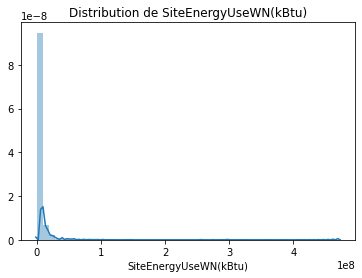

In [19]:
plt.title("Distribution de SiteEnergyUseWN(kBtu)")
x = pd.Series(df["SiteEnergyUseWN(kBtu)"], name="SiteEnergyUseWN(kBtu)")
ax = sns.distplot(x)
plt.show()

In [20]:
x.describe()

count    5.092000e+03
mean     5.065143e+06
std      1.566237e+07
min      0.000000e+00
25%      9.953312e+05
50%      1.917682e+06
75%      4.286292e+06
max      4.716139e+08
Name: SiteEnergyUseWN(kBtu), dtype: float64

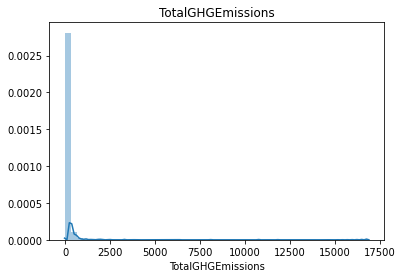

In [21]:
plt.title("TotalGHGEmissions")
x = pd.Series(df["TotalGHGEmissions"], name="TotalGHGEmissions")
ax = sns.distplot(x)
plt.show()

In [22]:
x.describe()

count     5092.000000
mean       107.449998
std        491.772634
min         -0.800000
25%          8.847500
50%         31.495000
75%         86.967500
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

In [23]:
df=df[df["SiteEnergyUseWN(kBtu)"]>0] 
df=df[df["TotalGHGEmissions"]>0] 
df=df[df["SiteEnergyUseWN(kBtu)"]<10000000] 
df=df[df["TotalGHGEmissions"]<1000] 

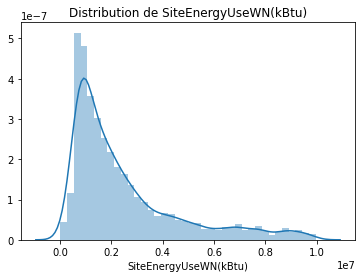

In [24]:
plt.title("Distribution de SiteEnergyUseWN(kBtu)")
x = pd.Series(df["SiteEnergyUseWN(kBtu)"], name="SiteEnergyUseWN(kBtu)")
ax = sns.distplot(x)
plt.show()

In [25]:
df["SiteEnergyUseWN(kBtu)_log"]=np.log(df["SiteEnergyUseWN(kBtu)"])

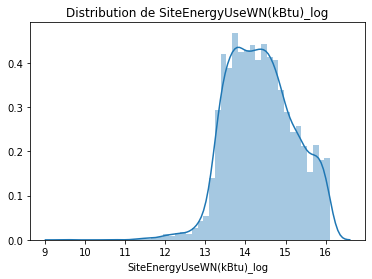

In [26]:
plt.title("Distribution de SiteEnergyUseWN(kBtu)_log")
x = pd.Series(df["SiteEnergyUseWN(kBtu)_log"], name="SiteEnergyUseWN(kBtu)_log")
ax = sns.distplot(x)
plt.show()

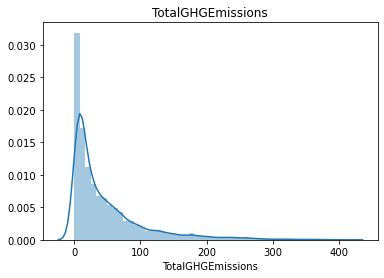

In [27]:
plt.title("TotalGHGEmissions")
x = pd.Series(df["TotalGHGEmissions"], name="TotalGHGEmissions")
ax = sns.distplot(x)
plt.show()

In [28]:
df["TotalGHGEmissions_log"]=np.log(df["TotalGHGEmissions"])

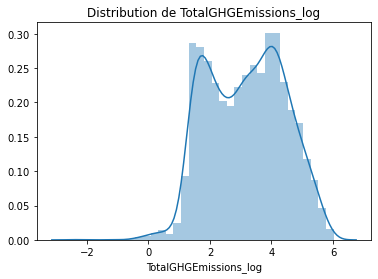

In [29]:
plt.title("Distribution de TotalGHGEmissions_log")
x = pd.Series(df["TotalGHGEmissions_log"], name="TotalGHGEmissions_log")
ax = sns.distplot(x)
plt.show()

# Analyse exploratoire

"Une émission de dioxyde de carbone est un rejet de ce gaz dans l'atmosphère terrestre, quelle qu'en soit la source. Le dioxyde de carbone (CO2) est le deuxième gaz à effet de serre le plus important dans l'atmosphère, après la vapeur d'eau, les deux contribuant respectivement à hauteur de 26 % et 60 % à l'effet de serre." == TotalGHGEmissions

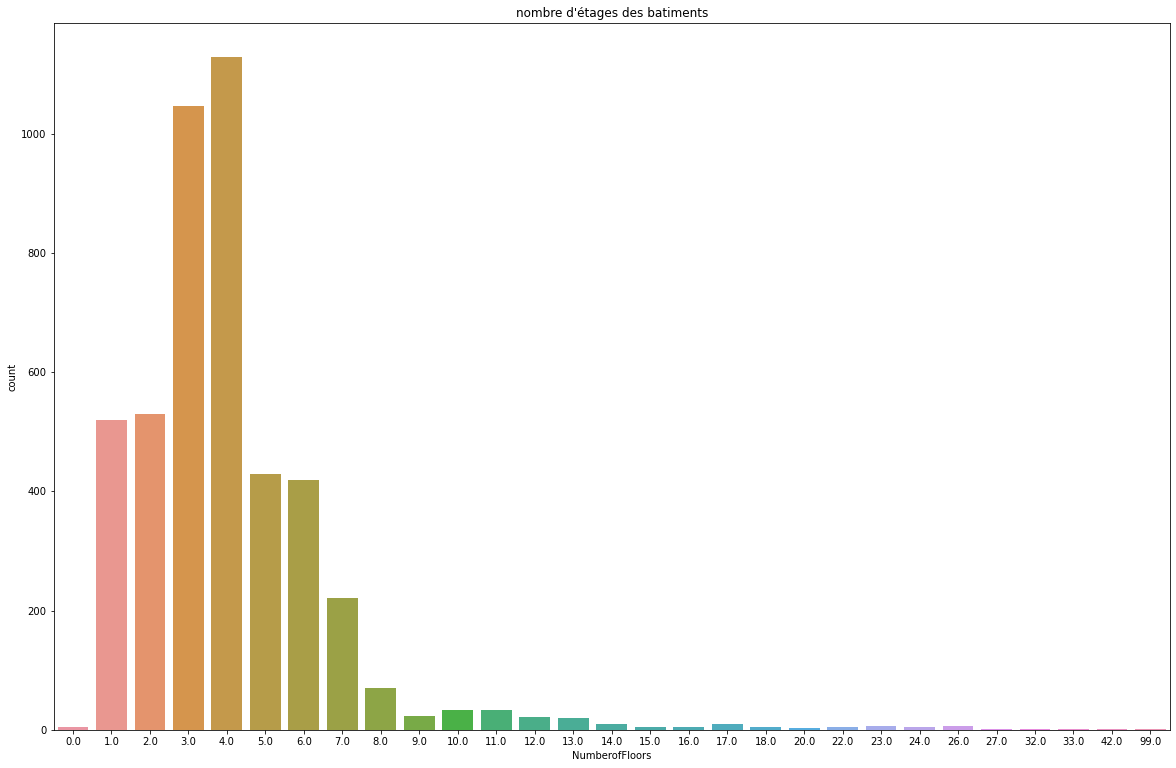

In [45]:
plt.figure(figsize=(20,13))
plt.title("nombre d'étages des batiments")
sns.countplot(x='NumberofFloors', data=df.sort_values(by=['NumberofFloors']))
plt.show()

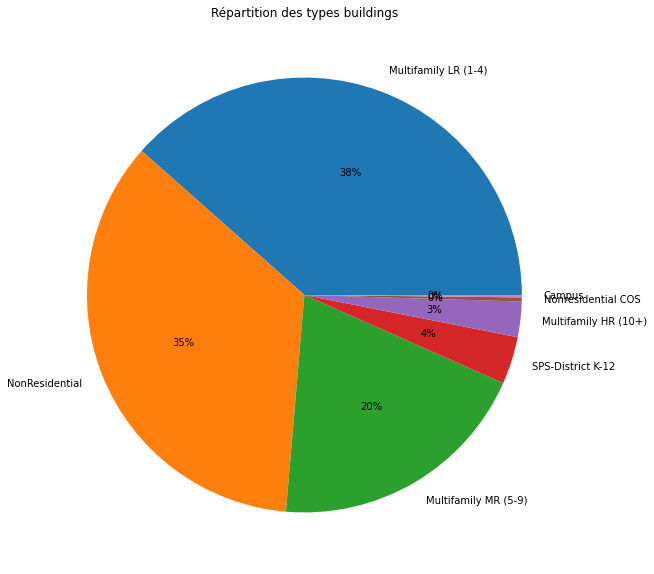

In [31]:
plt.figure(figsize=(10,10))
plt.title("Répartition des types buildings")
a=list(df.BuildingType.value_counts().values)
b=list(df.BuildingType.value_counts().index)
plt.pie(a,labels=b, autopct='%.0f%%')
plt.show()

In [32]:
a=abs(df.corr()["TotalGHGEmissions"]) > 0.2
df[list(a[a==True].index)].corr()["TotalGHGEmissions"]

Electricity(kWh)             0.369700
SiteEUI(kBtu/sf)             0.486154
PropertyGFATotal             0.470792
NaturalGas(therms)           0.914522
SiteEnergyUseWN(kBtu)        0.796051
SteamUse(kBtu)               0.352139
SiteEUIWN(kBtu/sf)           0.505155
LargestPropertyUseTypeGFA    0.491671
TotalGHGEmissions            1.000000
PropertyGFABuilding(s)       0.481103
SiteEnergyUse(kBtu)          0.769351
NaturalGas(kBtu)             0.914522
SourceEUI(kBtu/sf)           0.257756
SourceEUIWN(kBtu/sf)         0.262682
Electricity(kBtu)            0.369699
SiteEnergyUseWN(kBtu)_log    0.729119
TotalGHGEmissions_log        0.833932
Name: TotalGHGEmissions, dtype: float64

In [33]:
a=abs(df.corr()["SiteEnergyUseWN(kBtu)"]) > 0.2
df[list(a[a==True].index)].corr()["SiteEnergyUseWN(kBtu)"]

Electricity(kWh)             0.848755
SiteEUI(kBtu/sf)             0.511136
PropertyGFATotal             0.720605
OSEBuildingID               -0.256350
NaturalGas(therms)           0.637463
NumberofFloors               0.292430
SiteEnergyUseWN(kBtu)        1.000000
SteamUse(kBtu)               0.202686
SiteEUIWN(kBtu/sf)           0.502112
PropertyGFAParking           0.387076
LargestPropertyUseTypeGFA    0.707872
TotalGHGEmissions            0.796051
PropertyGFABuilding(s)       0.698803
SiteEnergyUse(kBtu)          0.996188
NaturalGas(kBtu)             0.637463
SourceEUI(kBtu/sf)           0.469002
SourceEUIWN(kBtu/sf)         0.466189
Electricity(kBtu)            0.848755
SiteEnergyUseWN(kBtu)_log    0.906495
TotalGHGEmissions_log        0.752029
Name: SiteEnergyUseWN(kBtu), dtype: float64

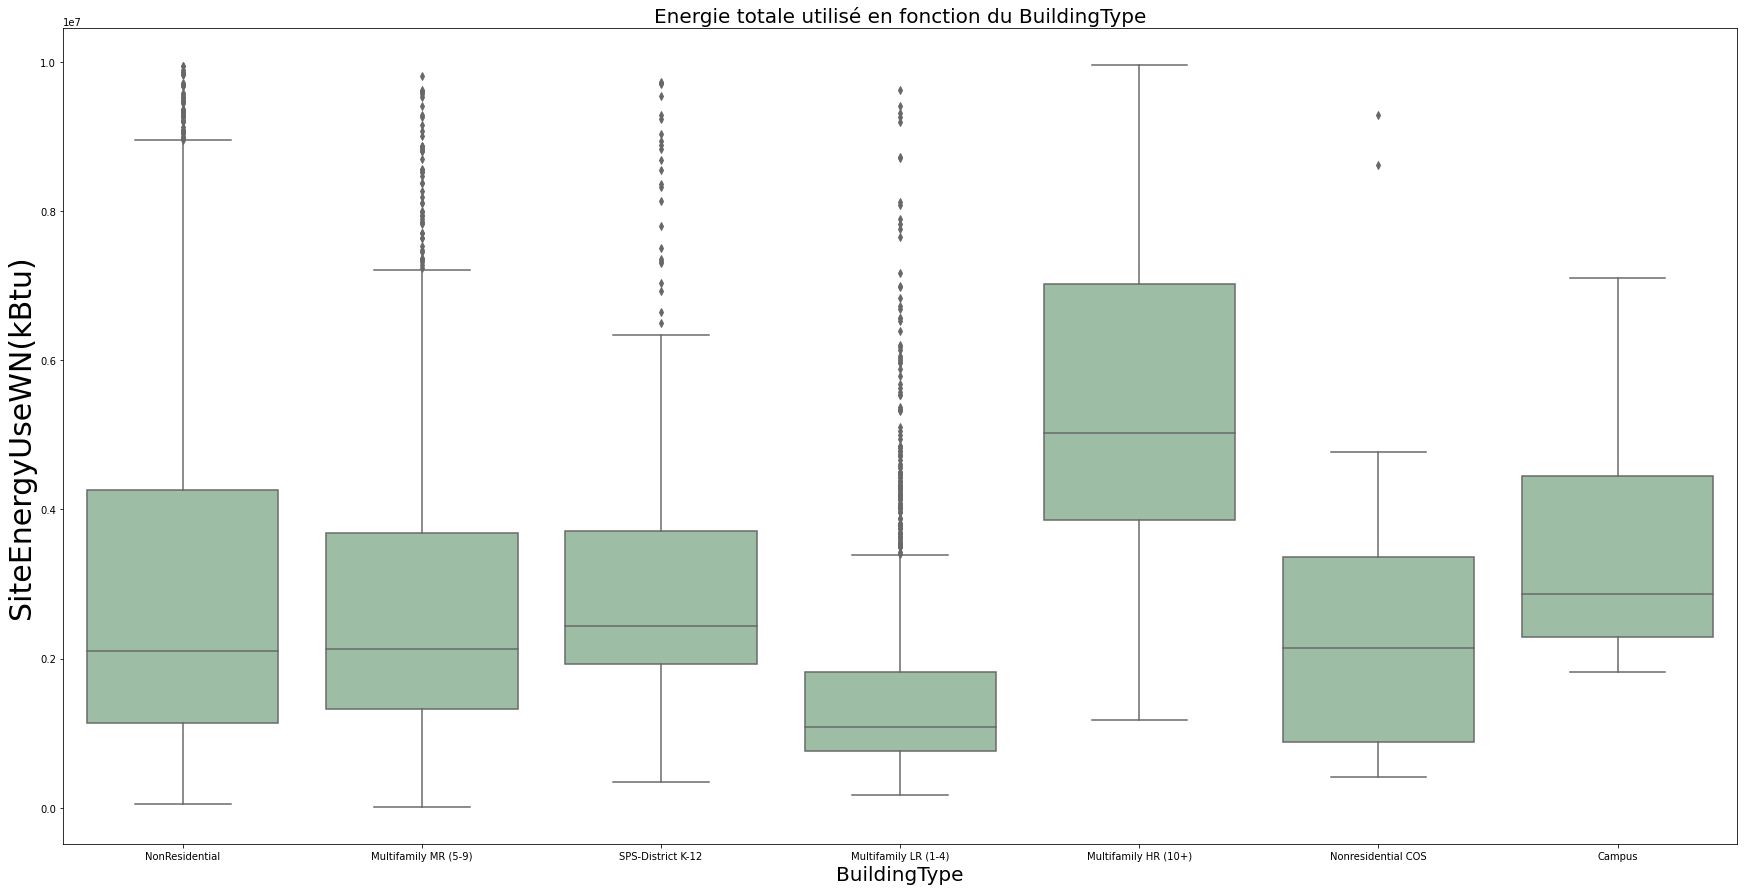

In [34]:
plt.figure(figsize=(30,15))
plt.title("Energie totale utilisé en fonction du BuildingType",size=20)
plt.xlabel('', size = 20)
plt.ylabel('', size = 30)
ax = sns.boxplot(x='BuildingType', y='SiteEnergyUseWN(kBtu)', data=df, color='#99c2a2')
plt.show()

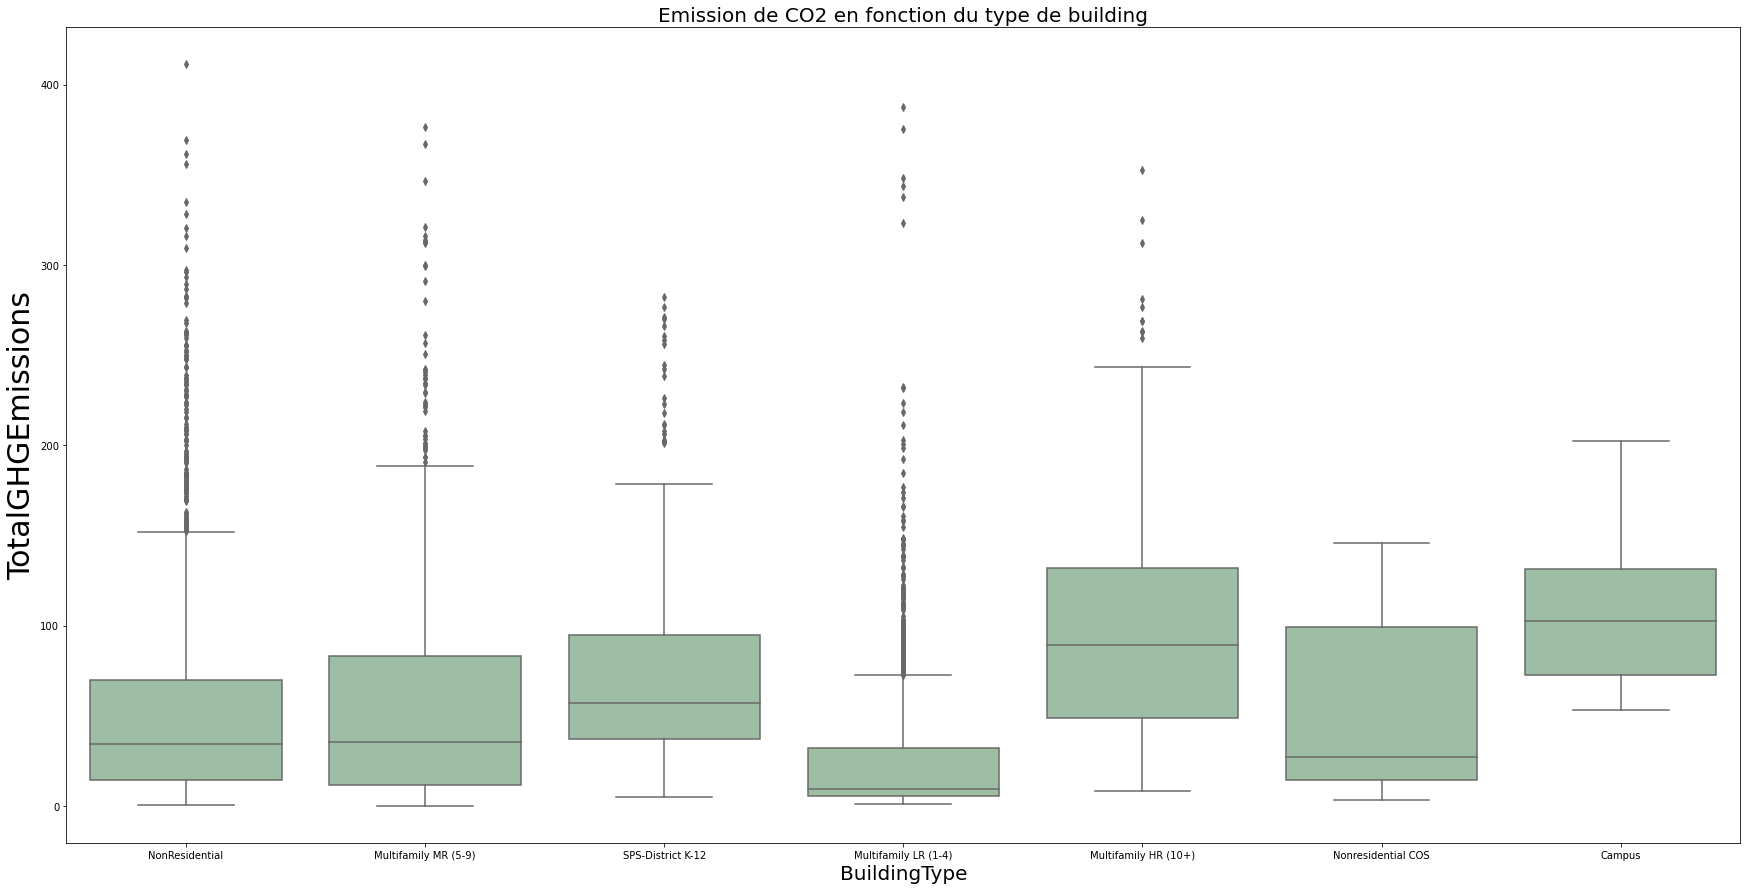

In [35]:
plt.figure(figsize=(30,15))
plt.title("Emission de CO2 en fonction du type de building",size=20)
plt.xlabel('', size = 20)
plt.ylabel('', size = 30)
ax = sns.boxplot(x='BuildingType', y="TotalGHGEmissions", data=df, color='#99c2a2')
plt.show()

Matrice de corrélation


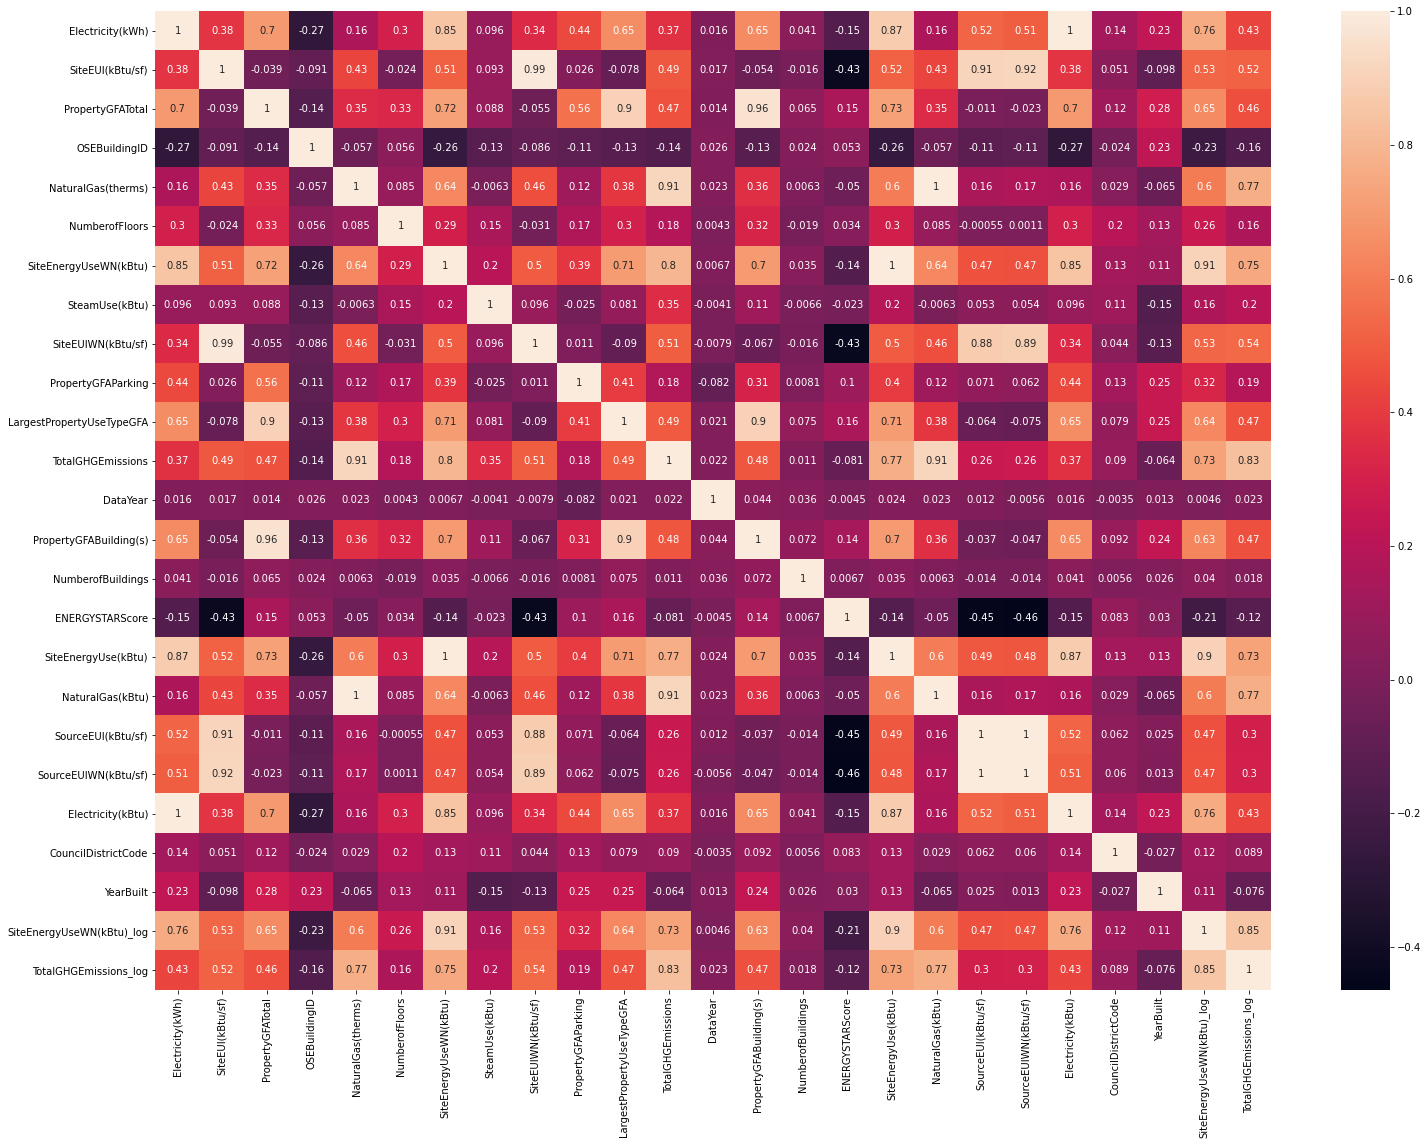

In [36]:
print("Matrice de corrélation")
plt.figure(figsize=(25, 18))
sns.heatmap(df.corr(), annot=True)
plt.show()

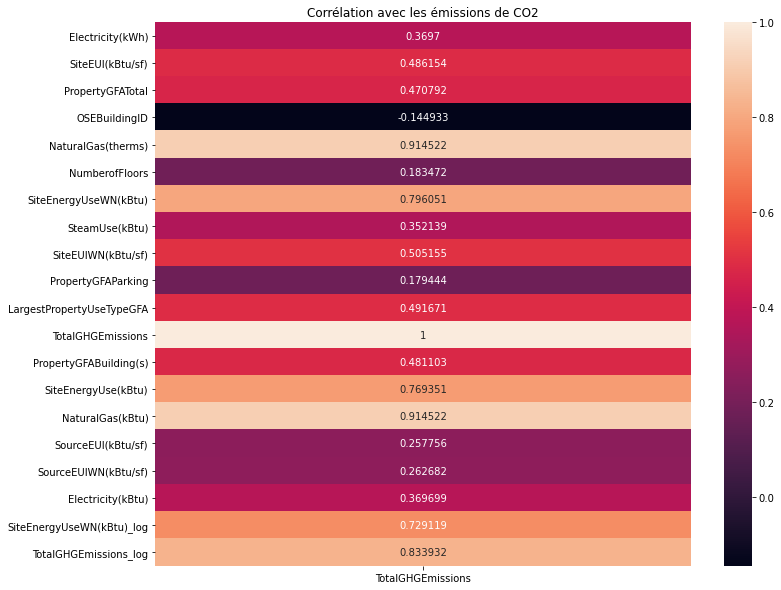

In [37]:
df_corr=df.corr()
plt.figure(figsize=(12, 10))
plt.title("Corrélation avec les émissions de CO2")

values=list(df[list(df_corr[abs(df_corr.TotalGHGEmissions)>=0.1].index)].corr()["TotalGHGEmissions"].values)

index=list(df[list(df_corr[abs(df_corr.TotalGHGEmissions)>=0.1].index)].corr()["TotalGHGEmissions"].index)

 

a = pd.DataFrame({"TotalGHGEmissions": values},

                  index=index)

 

sns.heatmap(a, annot=True, fmt="g")

 

plt.show()

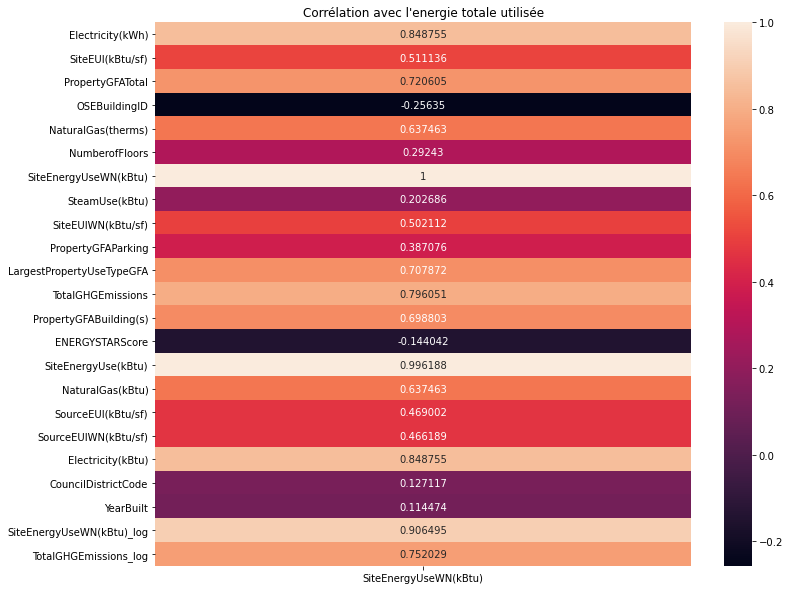

In [38]:
df_corr=df.corr()

plt.figure(figsize=(12, 10))
plt.title("Corrélation avec l'energie totale utilisée")

values=list(df[list(df_corr[abs(df_corr["SiteEnergyUseWN(kBtu)"])>=0.1].index)].corr()["SiteEnergyUseWN(kBtu)"].values)

index=list(df[list(df_corr[abs(df_corr["SiteEnergyUseWN(kBtu)"])>=0.1].index)].corr()["SiteEnergyUseWN(kBtu)"].index)

 

a = pd.DataFrame({"SiteEnergyUseWN(kBtu)": values},

                  index=index)

 

sns.heatmap(a, annot=True, fmt="g")

 

plt.show()

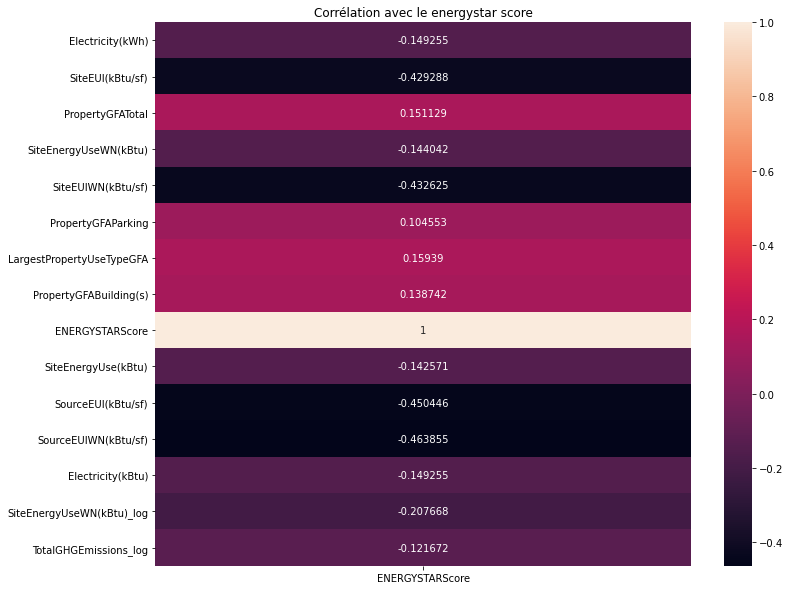

In [39]:
df_corr=df.corr()

plt.figure(figsize=(12, 10))
plt.title("Corrélation avec le energystar score")

values=list(df[list(df_corr[abs(df_corr["ENERGYSTARScore"])>=0.1].index)].corr()["ENERGYSTARScore"].values)

index=list(df[list(df_corr[abs(df_corr["ENERGYSTARScore"])>=0.1].index)].corr()["ENERGYSTARScore"].index)

 

a = pd.DataFrame({"ENERGYSTARScore": values},

                  index=index)

 

sns.heatmap(a, annot=True, fmt="g")

 

plt.show()

## Création variables 

In [40]:
df['NumberofFloors'].unique()

array([12., 11.,  6.,  9., 10.,  2.,  1.,  5.,  4.,  3., 20.,  7., 17.,
       22.,  8., 14., 15., 26., 13., 24., 23., 33., 18., 16., 99., 42.,
       32., 27.,  0.])

In [41]:
df['NumberofFloors_group'] = np.where(df['NumberofFloors']>3, "Plus de 3 étages", "Moins de 3 étages")
df['NumberofFloors_group'].value_counts()

Plus de 3 étages     2464
Moins de 3 étages    2101
Name: NumberofFloors_group, dtype: int64

In [42]:
df['YearBuilt'] = np.where(df['YearBuilt']>1999, "21ème siècle", "20ème siècle")
df['YearBuilt'].head()

0     20ème siècle
1     20ème siècle
6     20ème siècle
9     20ème siècle
12    20ème siècle
Name: YearBuilt, dtype: object

## Exportation dataset final

In [43]:
df.head()

,ComplianceStatus,Neighborhood,Electricity(kWh),SiteEUI(kBtu/sf),PropertyGFATotal,OSEBuildingID,NaturalGas(therms),NumberofFloors,SiteEnergyUseWN(kBtu),SteamUse(kBtu),SiteEUIWN(kBtu/sf),ListOfAllPropertyUseTypes,PrimaryPropertyType,PropertyGFAParking,LargestPropertyUseTypeGFA,TotalGHGEmissions,BuildingType,DataYear,PropertyGFABuilding(s),NumberofBuildings,ENERGYSTARScore,DefaultData,SiteEnergyUse(kBtu),NaturalGas(kBtu),PropertyName,TaxParcelIdentificationNumber,SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),Electricity(kBtu),CouncilDistrictCode,YearBuilt,LargestPropertyUseType,SiteEnergyUseWN(kBtu)_log,TotalGHGEmissions_log,NumberofFloors_group
0,Compliant,DOWNTOWN,1080307.0,78.9,88434,1,12724.0,12.0,7097539.0,2023032.0,80.3,Hotel,Hotel,0,88434.0,249.43,NonResidential,2015,88434,1.0,65.0,No,6981428.0,1272388.0,MAYFLOWER PARK HOTEL,659000030,173.5,175.1,3686160.0,7,20ème siècle,Hotel,15.775259,5.519178,Plus de 3 étages
1,Compliant,DOWNTOWN,1144563.0,94.4,103566,2,44490.0,11.0,8765788.0,0.0,99.0,"Hotel, Parking, Restaurant",Hotel,15064,83880.0,263.51,NonResidential,2015,88502,1.0,51.0,No,8354235.0,4448985.0,PARAMOUNT HOTEL,659000220,191.3,195.2,3905411.0,7,20ème siècle,Hotel,15.986367,5.574091,Plus de 3 étages
6,Compliant,DOWNTOWN,785342.0,76.9,83008,10,35733.0,11.0,6477493.0,0.0,79.6,Hotel,Hotel,0,81352.0,208.46,NonResidential,2015,83008,1.0,25.0,No,6252842.0,3573255.0,CAMLIN WORLDMARK HOTEL,660000825,149.5,158.2,2679698.0,7,20ème siècle,Hotel,15.683844,5.339747,Plus de 3 étages
9,Compliant,DOWNTOWN,694593.0,81.7,63712,13,7338.0,6.0,5203458.0,1483476.0,92.7,Multifamily Housing,Mid-Rise Multifamily,1496,56132.0,170.00,Multifamily MR (5-9),2015,62216,1.0,2.0,No,4587231.0,733803.0,LYON BUILDING,939000105,178.1,190.8,2370050.0,7,20ème siècle,Multifamily Housing,15.464834,5.135798,Plus de 3 étages
12,Compliant,DOWNTOWN,473326.0,104.7,65009,17,32051.0,9.0,6292213.0,1987163.0,96.8,Hotel,Hotel,0,65009.0,334.87,NonResidential,2015,65009,1.0,39.0,No,6807227.0,3205074.0,EXECUTIVE PACIFIC PLAZA,942000210,166.5,158.2,1615057.0,7,20ème siècle,Hotel,15.654823,5.813742,Plus de 3 étages


In [44]:
#Sauveagarde_dataset
df.to_csv("df.csv",index=False)

# Conclusion

En conclusion la base est plutot satisfaisante en terme de qualité des données.

Les variables qui nous intéresse sont  ENERGYSTARScore, SiteEnergyUseWN(kBtu) et  TotalGHGEmissions. 